Note: you may need to restart the kernel to use updated packages.


/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis/si_ks4/lib/python3.10/site-packages/spikeinterface/core/generate.py:2295: UserWarning: generate_unit_locations(): no solution for minimum_distance=20 and max_iteration=100
  warnings.warn(f"generate_unit_locations(): no solution for {minimum_distance=} and {max_iteration=}")


      0     1     2     3     4     5     6     7     8     9     ...  1009  \
0      5.0   0.0   0.0   1.0   1.0   0.0   5.0   0.0   0.0   1.0  ...   0.0   
1      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   2.0   0.0   0.0   2.0   1.0   0.0   2.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4     10.0   3.0   0.0   4.0   0.0   0.0   8.0   3.0   1.0   6.0  ...   2.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1120   8.0   2.0   0.0   9.0   1.0   1.0   9.0   1.0   0.0   3.0  ...   1.0   
1121   6.0   2.0   0.0  14.0   2.0   2.0  26.0   0.0   0.0   7.0  ...   0.0   
1122   9.0   8.0   0.0  12.0   0.0   1.0  17.0   2.0   1.0   5.0  ...   1.0   
1123   5.0   0.0   0.0   4.0   0.0   1.0   5.0   0.0   0.0   1.0  ...   0.0   
1124   7.0   0.0   0.0   2.0   0.0   1.0   7.0   1.0   1.0   4.0  ...   1.0   

      1010  1011  1012  1013  1014  1015  1016  101

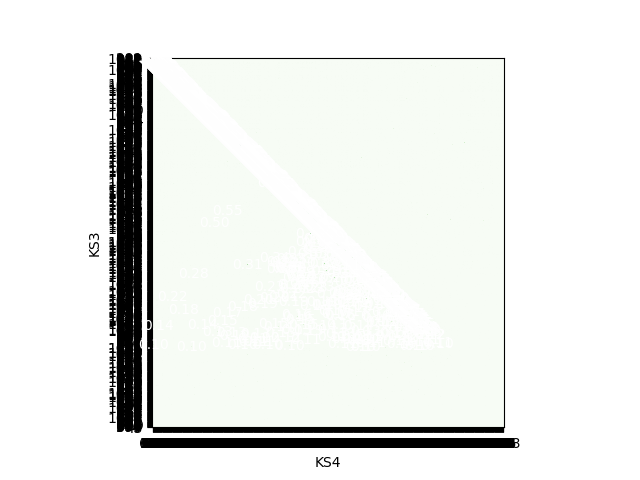

In [4]:
import spikeinterface as si
import spikeinterface.sorters as ss
import spikeinterface.comparison as scmp
import spikeinterface.widgets as sw
%pip install ipympl ipywidgets
%matplotlib widget
# First, let's generate a simulated dataset
recording, sorting = si.generate_ground_truth_recording()

# Then run two spike sorters and compare their outputs.
sorting_KS3 = si.load("/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis_MAINBRANCH/AnalyzedData/CDKL5_R59X_PS/CDKL5_R59X_PS/241025/M08020/Network/000128/well002/analyzer_output/sorting")
sorting_KS4 =si.load("/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis_MAINBRANCH/AnalyzedData/CDKL5_R59X_10112024_PS_ks4/CDKL5_R59X_10112024_PS/241025/M08020/Network/000128/well002/analyzer_output/sorting")

# Run the comparison
# Let's see how to inspect and access this matching.
cmp_KS3_KS4 = scmp.compare_two_sorters(
    sorting1=sorting_KS3,
    sorting2=sorting_KS4,
    sorting1_name='KS3',
    sorting2_name='KS4',
)

# We can check the agreement matrix to inspect the matching.
sw.plot_agreement_matrix(sorting_comparison=cmp_KS3_KS4)

# Some useful internal dataframes help to check the match and count
# like **match_event_count** or **agreement_scores**
print(cmp_KS3_KS4.match_event_count)
print(cmp_KS3_KS4.agreement_scores)

# In order to check which units were matched, the `comparison.get_matching()`
# method can be used. If units are not matched they are listed as -1.
sc_to_ks4, ks4_to_sc = cmp_KS3_KS4.get_matching()
print('matching KS3 to KS4')
print(sc_to_ks4)
print('matching KS4 to KS3')
print(ks4_to_sc)

In [5]:
print(len(sorting_KS3.get_unit_ids()))
print(len(sorting_KS4.get_unit_ids()))

1072
1019


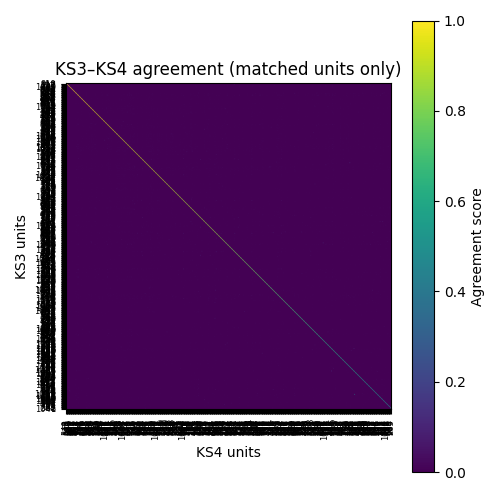

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# agreement_scores is a DataFrame: rows = KS3 units, cols = KS4 units
agreement_df = cmp_KS3_KS4.agreement_scores

# dicts: KS3 unit -> KS4 unit and vice versa
sc_to_ks4, ks4_to_sc = cmp_KS3_KS4.get_matching()

matched_ks3_ids = []
matched_ks4_ids = []
scores = []

# build matched unit lists and their agreement scores
for ks3_u, ks4_u in sc_to_ks4.items():
    if ks4_u == -1:
        continue  # skip unmatched

    matched_ks3_ids.append(ks3_u)
    matched_ks4_ids.append(ks4_u)

    # use .loc with unit IDs (row index = KS3 unit, column index = KS4 unit)
    score = agreement_df.loc[ks3_u, ks4_u]
    scores.append(score)

# sort by agreement (highest first) so diagonal is “nice”
order = np.argsort(scores)[::-1]
matched_ks3_ids = [matched_ks3_ids[i] for i in order]
matched_ks4_ids = [matched_ks4_ids[i] for i in order]

# sub-matrix of only matched units
sub_df = agreement_df.loc[matched_ks3_ids, matched_ks4_ids]
submat = sub_df.to_numpy()

plt.figure(figsize=(5, 5))
im = plt.imshow(submat, vmin=0, vmax=1, aspect='equal')
plt.colorbar(label="Agreement score")

plt.xticks(
    ticks=np.arange(len(matched_ks4_ids)),
    labels=matched_ks4_ids,
    rotation=90,
    fontsize=6
)
plt.yticks(
    ticks=np.arange(len(matched_ks3_ids)),
    labels=matched_ks3_ids,
    fontsize=6
)

plt.xlabel("KS4 units")
plt.ylabel("KS3 units")
plt.title("KS3–KS4 agreement (matched units only)")
plt.tight_layout()
plt.show()

In [5]:
analyzer_ks2 = si.load_sorting_analyzer("/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis_MAINBRANCH/AnalyzedData/CDKL5_R59X_PS/CDKL5_R59X_PS/241025/M08020/Network/000128/well001/analyzer_output/")
analyzer_ks4 = si.load_sorting_analyzer("/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis_MAINBRANCH/AnalyzedData/CDKL5_R59X_10112024_PS_ks4/CDKL5_R59X_10112024_PS/241025/M08020/Network/000128/well001/analyzer_output/")
analyzer_list = [analyzer_ks2, analyzer_ks4]

# match only day 1 and 2
p_tcmp = si.comparison.compare_templates(analyzer_ks2, analyzer_ks4, name1="KS2", name2="KS4")


/mnt/Vol20tb1/user_workspaces/mmpatil/MEA_Analysis/si_ks4/lib/python3.10/site-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator IncrementalPCA from version 1.2.2 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
